### Importing libraries

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


In [98]:
# loading the data from csv file to a Pandas DataFrame
calories = pd.read_csv('calories.csv')

In [99]:
# print the first 5 rows of the dataframe
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [100]:
exercise_data = pd.read_csv('exercise.csv')

In [101]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8


### Combining the two Dataframes

In [102]:
calories_data = pd.concat([exercise_data, calories['Calories']], axis=1)

In [103]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [104]:
# checking the number of rows and columns
calories_data.shape

(15000, 9)

In [105]:
# getting some informations about the data
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  int64  
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 1.0 MB


In [106]:
# checking for missing values
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

### Data Analysis

In [107]:
# get some statistical measures about the data
calories_data.describe()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,0.503533,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,0.500004,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,0.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,0.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,1.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,1.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,1.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


### Data Visualisation

In [108]:
sns.set_style() 
sns.set_context() 
# sns.set_palette()

<Axes: xlabel='Gender', ylabel='Count'>

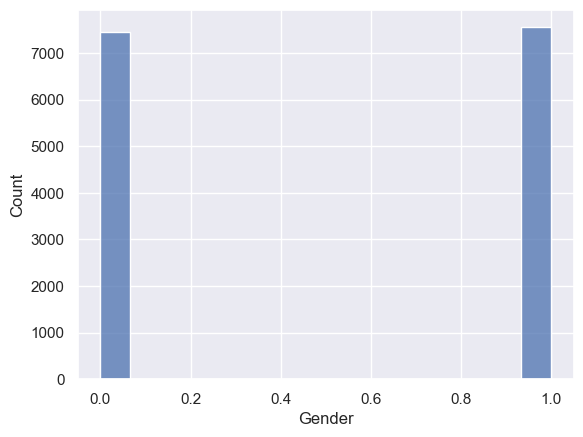

In [109]:
# plotting the gender column in count plot
sns.histplot(calories_data['Gender'])

<Axes: xlabel='Age', ylabel='Count'>

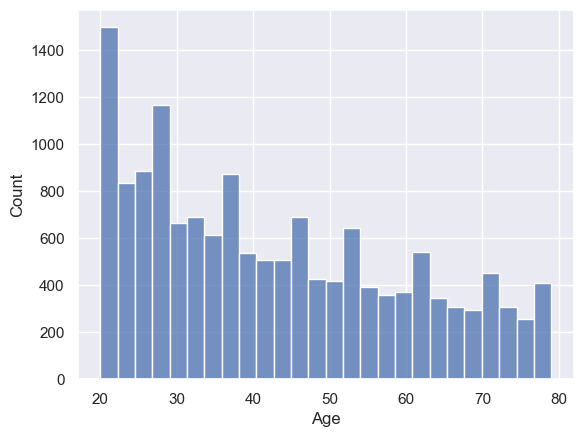

In [110]:
# finding the distribution of "Age" column
sns.histplot(calories_data['Age'])

<Axes: xlabel='Height', ylabel='Count'>

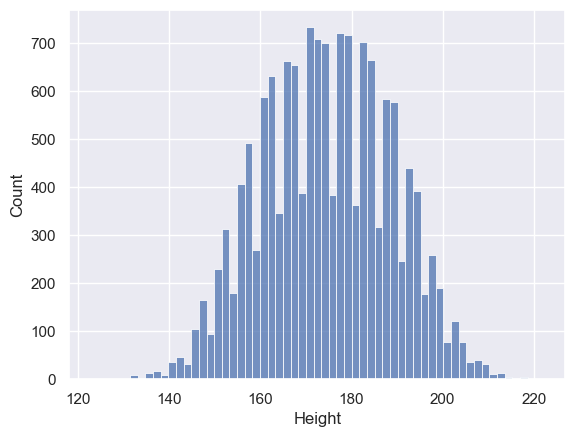

In [111]:
# finding the distribution of "Height" column
sns.histplot(calories_data['Height'])

<Axes: xlabel='Weight', ylabel='Count'>

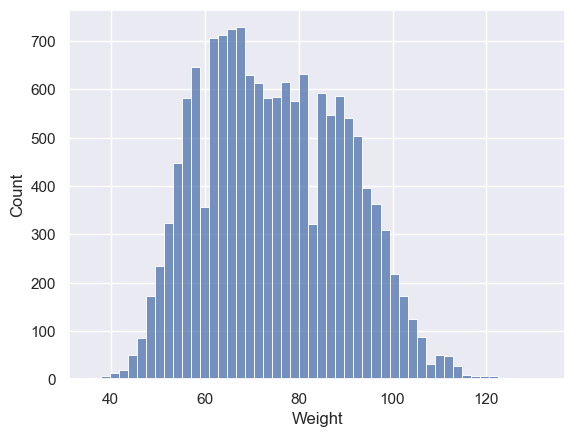

In [112]:
# finding the distribution of "Weight" column
sns.histplot(calories_data['Weight'])

### Finding the correlation in the dataset

##### 1. Positive Correlation
##### 2. Negative Correlation 

In [113]:
print(calories_data.dtypes)
correlation = calories_data.corr()
print(correlation)

correlation = calories_data.corr()

User_ID         int64
Gender          int64
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
Calories      float64
dtype: object
             User_ID    Gender       Age    Height    Weight  Duration  \
User_ID     1.000000  0.000687 -0.001827 -0.013520 -0.011603 -0.002751   
Gender      0.000687  1.000000 -0.003222 -0.710534 -0.783186 -0.003440   
Age        -0.001827 -0.003222  1.000000  0.009554  0.090094  0.013247   
Height     -0.013520 -0.710534  0.009554  1.000000  0.958451 -0.004625   
Weight     -0.011603 -0.783186  0.090094  0.958451  1.000000 -0.001884   
Duration   -0.002751 -0.003440  0.013247 -0.004625 -0.001884  1.000000   
Heart_Rate -0.000457 -0.011555  0.010482  0.000528  0.004311  0.852869   
Body_Temp   0.000923 -0.007264  0.013175  0.001200  0.004095  0.903167   
Calories   -0.001661 -0.022357  0.154395  0.017537  0.035481  0.955421   

            Heart_Rate  Body_Temp  Calories  
U

<Axes: >

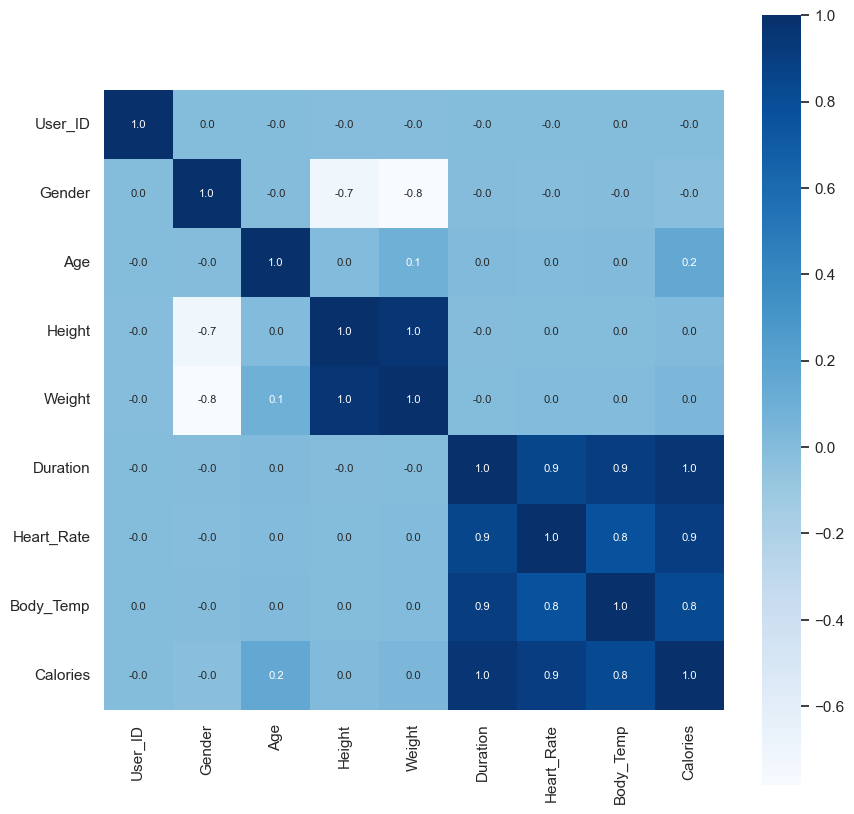

In [114]:
# constructing a heatmap to understand the correlation

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')


#### Converting the text data to numerical values

In [129]:
# calories_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)

In [130]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


#### Separating features and Target

In [131]:
X = calories_data.drop(columns=['User_ID','Calories'], axis=1)
Y = calories_data['Calories']

In [132]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [133]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


#### Splitting the data into training data and Test data

In [147]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
X.to_csv('X_train.csv', index=False)  # Set index=False to avoid writing row numbers
X_test.to_csv('X_test.csv', index=False)
Y.to_csv('Y_train.csv', index=False)
Y_test.to_csv('Y_test.csv', index=False)

In [144]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


## Model Training

#### XGBoost Regressor

In [136]:
# loading the model
model = XGBRegressor()

In [137]:
# training the model with X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### Evaluation

##### Prediction on Test Data

In [138]:
test_data_prediction = model.predict(X_test)

In [139]:
print(test_data_prediction)

[125.58828  222.11377   38.725952 ... 144.3179    23.425894  90.100494]


### Mean Absolute Error

In [140]:
mae = metrics.mean_absolute_error(Y_test, test_data_prediction)

In [141]:
print("Mean Absolute Error = ", mae)

Mean Absolute Error =  1.4833678883314132
